# Importing Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('float_format', '{:f}'.format)

In [2]:
df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\outlier_clean.csv")

In [3]:
# resampling dataset into 1.5 million rows
import pandas as pd

# Load your dataset into a DataFrame (replace 'dataset.csv' with your dataset file)

# Set the desired number of rows to resample
desired_rows = 1.5e6  # 1.5 million rows

# Calculate the fraction to sample based on the desired number of rows
sample_frac = desired_rows / len(df)

# Resample the data to the desired number of rows
df = df.sample(frac=sample_frac)

# Print the resampled data
df.reset_index(drop=True, inplace=True)


In [4]:
df.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,938123,2014-06-07,30,SEAFOOD,0.000000,0,Holiday,National,Ecuador,Carnaval,...,Guayaquil,Guayas,C,3,771.000000,2014,6,23,2,Saturday
1,2718206,2017-02-12,27,PREPARED FOODS,154.737000,1,Holiday,National,Ecuador,Carnaval,...,Daule,Guayas,D,1,1959.000000,2017,2,6,1,Sunday
2,2242689,2016-05-26,35,DELI,59.000000,3,Holiday,National,Ecuador,Carnaval,...,Playas,Guayas,C,3,633.000000,2016,5,21,2,Thursday
3,1383456,2015-02-07,26,PRODUCE,1.000000,0,Holiday,National,Ecuador,Carnaval,...,Guayaquil,Guayas,D,10,599.000000,2015,2,6,1,Saturday
4,2346836,2016-07-20,8,DAIRY,1553.000000,15,Holiday,National,Ecuador,Carnaval,...,Quito,Pichincha,D,8,2694.000000,2016,7,29,3,Wednesday


In [5]:
# droping unwanted columns
df.drop(columns= "Unnamed: 0", inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'])

# Types of Features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date          1500000 non-null  datetime64[ns]
 1   store_nbr     1500000 non-null  int64         
 2   family        1500000 non-null  object        
 3   sales         1500000 non-null  float64       
 4   onpromotion   1500000 non-null  int64         
 5   holiday_type  1500000 non-null  object        
 6   locale        1500000 non-null  object        
 7   locale_name   1500000 non-null  object        
 8   description   1500000 non-null  object        
 9   transferred   1500000 non-null  bool          
 10  oil_price     1499112 non-null  float64       
 11  city          1500000 non-null  object        
 12  state         1500000 non-null  object        
 13  store_type    1500000 non-null  object        
 14  cluster       1500000 non-null  int64         
 15

**1. Numerical Feature**

In [8]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' and  df[feature].dtype != 'datetime64[ns]']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 11
['store_nbr', 'sales', 'onpromotion', 'transferred', 'oil_price', 'cluster', 'transactions', 'year', 'month', 'week', 'quarter']


**2. Categorical Features**

In [9]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 9
['family', 'holiday_type', 'locale', 'locale_name', 'description', 'city', 'state', 'store_type', 'day_of_week']


**3. Discerte Features**

In [10]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))
print(discrete_feature)

Num of Discrete Features : 5
['transferred', 'cluster', 'year', 'month', 'quarter']


**4. Year Features**

In [11]:
year_features=[feature for feature in df.columns if 'date' in feature or 'month' in feature or 'year' in feature or  'day' in feature or 'week' in feature]
print('Num of Year Features :',len(year_features))
print(year_features)

Num of Year Features : 6
['date', 'holiday_type', 'year', 'month', 'week', 'day_of_week']


**5. Continuous features**

In [12]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_features]
print('Num of Continuous Features :',len(continuous_feature))
print(continuous_feature)

Num of Continuous Features : 5
['store_nbr', 'sales', 'onpromotion', 'oil_price', 'transactions']


# Hypothesis Testing

# 1. Checking Corelation

In [13]:
df.corr()

,store_nbr,sales,onpromotion,transferred,oil_price,cluster,transactions,year,month,week,quarter
store_nbr,1.000000,0.040907,0.006680,-0.000176,-0.000471,-0.060362,0.182289,-0.000009,0.000337,0.000484,0.000524
sales,0.040907,1.000000,0.428825,-0.002882,-0.075592,0.038494,0.213975,0.081102,0.019911,0.016385,0.018331
onpromotion,0.006680,0.428825,1.000000,0.014363,-0.154615,0.005912,0.026805,0.198851,0.025098,0.021735,0.024281
transferred,-0.000176,-0.002882,0.014363,1.000000,-0.026914,0.000230,-0.012262,0.056259,0.004921,0.031470,0.016934
oil_price,-0.000471,-0.075592,-0.154615,-0.026914,1.000000,-0.000152,0.022994,-0.833959,0.008558,0.005586,0.009460
cluster,-0.060362,0.038494,0.005912,0.000230,-0.000152,1.000000,0.190262,-0.000252,0.000595,0.000436,0.000651
transactions,0.182289,0.213975,0.026805,-0.012262,0.022994,0.190262,1.000000,-0.035209,0.040000,0.030448,0.031869
year,-0.000009,0.081102,0.198851,0.056259,-0.833959,-0.000252,-0.035209,1.000000,-0.142948,-0.136554,-0.137441
month,0.000337,0.019911,0.025098,0.004921,0.008558,0.000595,0.040000,-0.142948,1.000000,0.966211,0.970009
week,0.000484,0.016385,0.021735,0.031470,0.005586,0.000436,0.030448,-0.136554,0.966211,1.000000,0.941094


<AxesSubplot:>

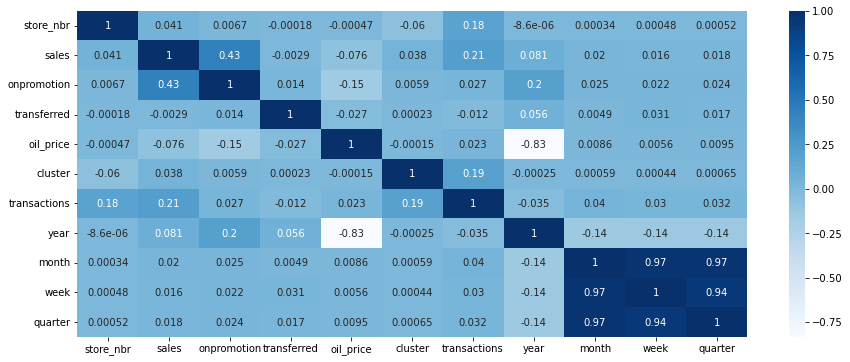

In [14]:
plt.figure(figsize =(15,6))
sns.heatmap(df.corr(), annot= True, cmap ="Blues")

In [15]:
# checking correlation of features with sales
df.corr()['sales']

store_nbr       0.040907
sales           1.000000
onpromotion     0.428825
transferred    -0.002882
oil_price      -0.075592
cluster         0.038494
transactions    0.213975
year            0.081102
month           0.019911
week            0.016385
quarter         0.018331
Name: sales, dtype: float64

<AxesSubplot:>

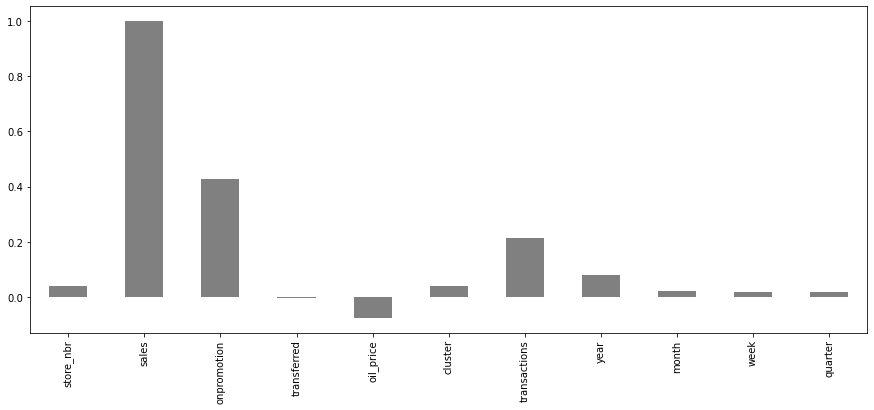

In [16]:
# checking correlation of features with sales
plt.figure(figsize =(15,6))
df.corr()['sales'].plot(kind ='bar', color ='grey')

**Observation**
1. OnPromotion has highest correlation with sales which is 43%
2. Oil_price has highest negative correlation with 8%
3. Transcations has second highest correlation with sales

In [17]:
num_df = df[num_features]

####   Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [18]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Shapiro Hypothesis Result
0,store_nbr,Not Normally Distributed
1,sales,Not Normally Distributed
2,onpromotion,Not Normally Distributed
3,transferred,Not Normally Distributed
4,oil_price,Normally Distributed
5,cluster,Not Normally Distributed
6,transactions,Not Normally Distributed
7,year,Not Normally Distributed
8,month,Not Normally Distributed
9,week,Not Normally Distributed


**observation**
1. Only oil price is normarly distributed 
2. other all columns are not normaly distributed

####  Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

In [19]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [26]:
columns_combination = []
test_results = []
#test_correlation(spearmanr,'math score','reading score')
for i in num_features:
    for j in num_features:
            test_correlation(spearmanr,i,j)
        

In [30]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr[df_spearmanr['col2'] == 'sales']

,col1,col2
Dependent Samples,store_nbr,sales
Dependent Samples,sales,sales
Dependent Samples,onpromotion,sales
Independent Samples,transferred,sales
Dependent Samples,oil_price,sales
Dependent Samples,cluster,sales
Dependent Samples,transactions,sales
Dependent Samples,year,sales
Dependent Samples,month,sales
Dependent Samples,week,sales


**Observation**
1. All Features are dependent on sales expect 1 feature
2. Transferred is indepent to sales so we can drop this features

####  Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [22]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in cat_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['sales'], df[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[cat_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,family,Dependent Categories
1,holiday_type,Dependent Categories
2,locale,Independent Categories
3,locale_name,Independent Categories
4,description,Dependent Categories
5,city,Independent Categories
6,state,Independent Categories
7,store_type,Dependent Categories
8,day_of_week,Dependent Categories


**Observation**
1. locale, locale_name, city, state are independent columns to sales so we can drop that columns\
2. all other features are dependent to sales


# Anova Test

In [31]:
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test for each column
results = []
for column in num_features:
    if column != 'sales':
        f_statistic, p_value = f_oneway(df[column], df['sales'])
        results.append((column, f_statistic, p_value))

# Create a DataFrame of results
results_df = pd.DataFrame(results, columns=['Column', 'F-Statistic', 'P-value'])

# Sort the DataFrame by p-value in ascending order
results_df = results_df.sort_values(by='P-value')

# Print the DataFrame of results
results_df


,Column,F-Statistic,P-value
0,store_nbr,133701.007008,0.000000
1,onpromotion,154505.806281,0.000000
2,transferred,156795.762376,0.000000
4,cluster,149482.540763,0.000000
5,transactions,1281650.220883,0.000000
6,year,3329584.343067,0.000000
7,month,151414.561496,0.000000
8,week,135463.905105,0.000000
9,quarter,154700.778654,0.000000
3,oil_price,NaN,NaN


**Observation**
* If the p-value is zero in an ANOVA test, it indicates that there is strong evidence to reject the null hypothesis. In the context of ANOVA, the null hypothesis assumes that there are no significant differences between the means of the groups being compared.

* A p-value of zero suggests that the observed differences between the groups are highly unlikely to be due to chance. Therefore, it implies that there are indeed statistically significant differences between the groups' means.

* When conducting an ANOVA test, the decision to reject or fail to reject the null hypothesis is based on a significance level (alpha) that is predetermined. Typically, if the p-value is less than the chosen significance level (e.g., 0.05), the null hypothesis is rejected in favor of the alternative hypothesis, which states that there are significant differences among the groups.

* It's important to note that a p-value of zero is not an absolute certainty of the differences but rather indicates extremely strong evidence against the null hypothesis. It suggests that the observed differences are highly likely to be meaningful and not due to random chance.

In [32]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,2014-06-07,30,SEAFOOD,0.000000,0,Holiday,National,Ecuador,Carnaval,False,...,Guayaquil,Guayas,C,3,771.000000,2014,6,23,2,Saturday
1,2017-02-12,27,PREPARED FOODS,154.737000,1,Holiday,National,Ecuador,Carnaval,False,...,Daule,Guayas,D,1,1959.000000,2017,2,6,1,Sunday
2,2016-05-26,35,DELI,59.000000,3,Holiday,National,Ecuador,Carnaval,False,...,Playas,Guayas,C,3,633.000000,2016,5,21,2,Thursday
3,2015-02-07,26,PRODUCE,1.000000,0,Holiday,National,Ecuador,Carnaval,False,...,Guayaquil,Guayas,D,10,599.000000,2015,2,6,1,Saturday
4,2016-07-20,8,DAIRY,1553.000000,15,Holiday,National,Ecuador,Carnaval,False,...,Quito,Pichincha,D,8,2694.000000,2016,7,29,3,Wednesday


In [33]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type',
       'locale', 'locale_name', 'description', 'transferred', 'oil_price',
       'city', 'state', 'store_type', 'cluster', 'transactions', 'year',
       'month', 'week', 'quarter', 'day_of_week'],
      dtype='object')

In [34]:
# droping some features from above analysis
fe_drop = ['locale','locale_name', 'description', 'transferred','state','city','year','month','week','quarter','day_of_week']

In [36]:
df.drop(columns=fe_drop,inplace=True)

In [38]:
s

,date,store_nbr,family,sales,onpromotion,holiday_type,oil_price,store_type,cluster,transactions
0,2014-06-07,30,SEAFOOD,0.000000,0,Holiday,103.713223,C,3,771.000000
1,2017-02-12,27,PREPARED FOODS,154.737000,1,Holiday,53.237947,D,1,1959.000000
2,2016-05-26,35,DELI,59.000000,3,Holiday,49.000000,C,3,633.000000
3,2015-02-07,26,PRODUCE,1.000000,0,Holiday,51.893170,D,10,599.000000
4,2016-07-20,8,DAIRY,1553.000000,15,Holiday,44.960000,D,8,2694.000000
...,...,...,...,...,...,...,...,...,...,...
1499995,2016-10-14,19,PET SUPPLIES,1.000000,0,Holiday,50.350000,C,15,997.000000
1499996,2014-10-05,5,EGGS,154.000000,0,Holiday,90.278836,D,4,1270.000000
1499997,2013-09-17,15,DAIRY,99.000000,0,Holiday,105.360000,C,15,1325.000000
1499998,2013-03-29,10,BEAUTY,0.000000,0,Holiday,97.239057,C,15,858.000000


<AxesSubplot:xlabel='cluster', ylabel='sales'>

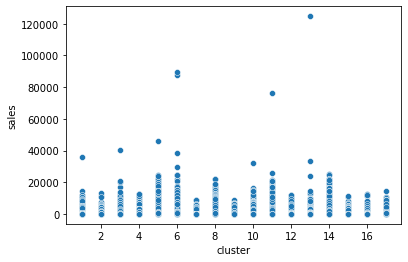

In [39]:
# ploting scatter plot between sales and cluster
sns.scatterplot(data=df, x="cluster", y ='sales')

<AxesSubplot:xlabel='transactions', ylabel='sales'>

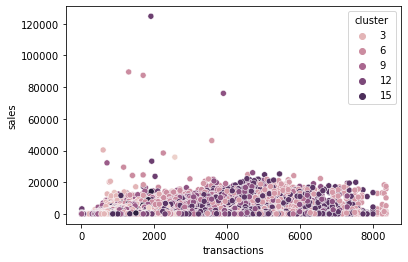

In [41]:
sns.scatterplot(data=df, x="transactions", y ='sales',hue='cluster')

In [51]:
df.dropna(inplace = True)

In [52]:
df1 = df.copy

In [64]:
df1.head()

AttributeError: 'function' object has no attribute 'head'

# Applying Machine Linearing Models

In [53]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le_columns = ["holiday_type", 'store_type']
le = LabelEncoder()
for i in le_columns:
    df[i] = le.fit_transform(df[i])

In [54]:
from sklearn.model_selection import train_test_split
X = df.drop(['sales'], axis=1)
y = df['sales']

In [55]:
X.head()

,date,store_nbr,family,onpromotion,holiday_type,oil_price,store_type,cluster,transactions
0,2014-06-07,30,SEAFOOD,0,3,103.713223,2,3,771.000000
1,2017-02-12,27,PREPARED FOODS,1,3,53.237947,3,1,1959.000000
2,2016-05-26,35,DELI,3,3,49.000000,2,3,633.000000
3,2015-02-07,26,PRODUCE,0,3,51.893170,3,10,599.000000
4,2016-07-20,8,DAIRY,15,3,44.960000,3,8,2694.000000


In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder
import numpy as np

num_features = [feature for feature in X.columns if X[feature].dtype != 'O' and X[feature].dtype != 'datetime64[ns]']
#le_columns = ["holiday_type", 'locale', 'store_type']
bin_columns = ['family']

numeric_transformer = StandardScaler()
bin_transformer = BinaryEncoder()
le_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', bin_transformer, bin_columns),
        #("le", 'passthrough', le_columns),
        ("num", numeric_transformer, num_features)
    ]
)
X =preprocessor.fit_transform(X)

In [57]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.44703282e-04, -1.17872305e+00, -9.98490637e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.31839973e-01, -1.60885581e+00,  2.82476536e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.44703282e-04, -1.17872305e+00, -1.14728985e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.44703282e-04,  1.40207353e+00, -4.01137259e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.44703282e-04,  1.40207353e+00, -9.04682435e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.31839973e-01, -1.03391141e-01,  1.05450726e+00]])

In [58]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=36)
X_train.shape, X_test.shape

((1124334, 13), (374778, 13))

# Linear regression

In [65]:
Predictor = df.columns

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr = LinearRegression()
liner = lr.fit(X_train,y_train)
predict = lr.predict(X_test)
coefficients = lr.coef_
print('R2 Value:',r2_score(y_train, lr.predict(X_train)))
print('R2 Value:',r2_score(y_test, predict))
print(coefficients)

R2 Value: 0.24639751229466245
R2 Value: 0.2525976104839942
[-269.19222368  -13.51829939 -105.30045368  -49.2327472  -163.27805196
  265.41466158    4.67343774  445.47271845    5.60204454  -20.82091316
   11.89636029   -0.52625938  231.60491206]


In [76]:
import statsmodels.api as sm

# Assuming X is the DataFrame with 13 columns and y is the target variable
X = sm.add_constant(X)  # Add constant term for the intercept
model = sm.OLS(y, X)
results = model.fit()

p_values = results.pvalues[1:]  # Exclude the constant term
p_values

x1    0.000000
x2    0.000000
x3    0.000000
x4    0.000000
x5    0.000000
x6    0.000000
x7    0.000000
x8    0.000000
x9    0.000000
x10   0.000000
x11   0.000000
x12   0.701297
x13   0.000000
dtype: float64

# Random Forest Regression

In [77]:
# random forest
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor()
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
print('R2 Value:',metrics.r2_score(y_test, prediction))


KeyboardInterrupt: 

In [ ]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# XGBoost Regression

In [80]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
print('R2 Value:',metrics.r2_score(y_test, prediction))

KeyboardInterrupt: 

In [ ]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Time Series Algorthms

In [81]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<AxesSubplot:xlabel='sales', ylabel='Density'>

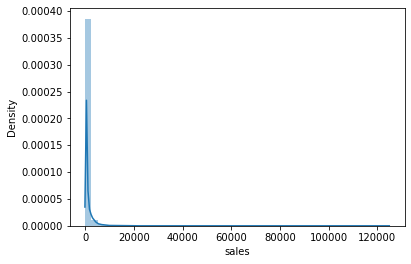

In [82]:
sns.distplot(df['sales'])

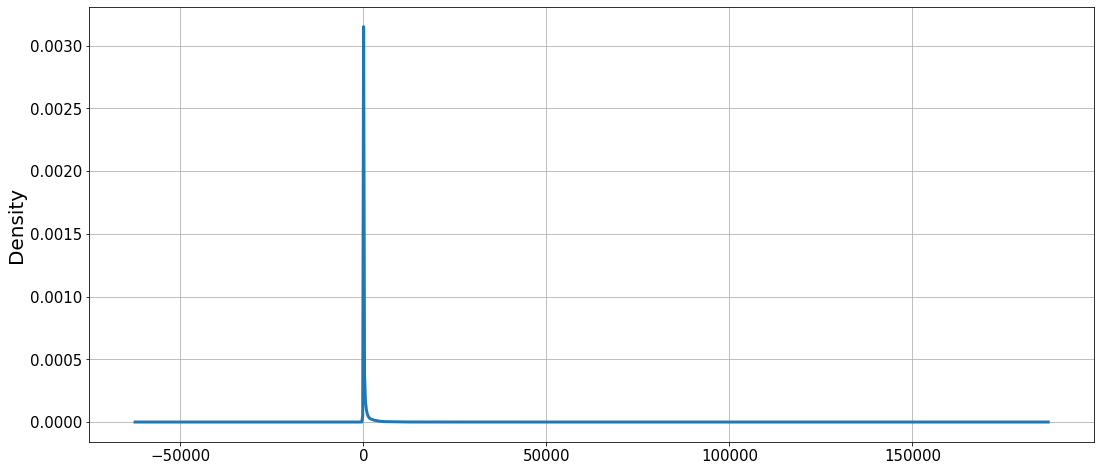

In [83]:
# Distribution of the close price  
df_close = df['sales'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [84]:
adfuller(df['sales'],autolag='AIC')

MemoryError: Unable to allocate 881. MiB for an array with shape (77, 1498978) and data type float64